# Week 4: Statistical Analysis and Project

# Distributions

A distribution is a shape that describes the likelihood of a value being sampled.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Binomial distribution

## Ex: Flipping coins

We consider the result of each flip as a random variable. We consider the set of the results from many flips a distribution. In this case, it is a binomial distribution. 

* Binomial distribution (two possible outcomes)
* Discrete (categories of heads and tails, no real numbers)
* Evenly weighted (heads and tails are equally likely)

Numpy has some functions built into it, allowing us to generate coin flips. In this case, this is an **evenly** weighted binomial distribution since the two probabilities are equal.

In [3]:
np.random.binomial(1,0.5)

0

In [5]:
np.random.binomial(1000,0.5)/1000

0.494

Challenge: Suppose we want to simulate the probability of flipping a fair coin 20 times, and getting a number greater than or equal to 15. Use `np.random.binomial(n,p,size)` to do 10000 simulations of flipping a fair coin 20 times, then see what proportion of the simulations are 15 or greater.

My first solution:

In [8]:
num_simulations = 10000

num_successes = 0
for i in np.arange(num_simulations):
    count = np.random.binomial(20,.5)
    if count > 14:
        num_successes += 1
        
print(num_successes/num_simulations)

0.0207


Make it simpler:

In [18]:
x = np.random.binomial(20,.5,10000)

In [19]:
np.sum(x > 14)/10000

0.020400000000000001

## Ex: Tornados

What's the likelihood of having a tornado hit town? In this case, we are looking at an **unevenly** distributed binomial distribution, since the probability of a tornado hitting town is very small. Let's say the probability is 0.01%. How many tornados could we expect over a 100,000 day period?

In [21]:
p_tornado = 0.01/100
np.random.binomial(100000, p_tornado)

6

Instead, let's say the chance is 1%. What is the probability of a tornado hitting two days in a row?

In [26]:
p_tornado = 1/100
num_days = 1000000

tornado_events = np.random.binomial(1, p_tornado, num_days)

two_days_in_a_row = 0
for j in range(1,len(tornado_events)-1):
    if tornado_events[j] == 1 and tornado_events[j-1] == 1:
        two_days_in_a_row += 1
        
print('{} tornadoes back to back in {} years'.format(two_days_in_a_row, num_days/365))

95 tornadoes back to back in 2739.72602739726 years


Rather than counting the number of tornadoes, this keeps track of the order of tornados and tornado-less days for more advanced analysis. 

# Continuous distributions

Rather than calculating the mean, we now calculate the expected value. What would be the mean of a distribution if infinite samples were taken?

Consider five characteristics

* Central tendency: Mean, mode, or median
* Variability: standard deviation, interquartile range
* Kurtosis: The shape of the tails (use built-in scipy functions)
* Skew: Use `stats.skew`, useful for chi-squared distribution

In [27]:
distribution = np.random.normal(0.75, size=1000)
np.std(distribution)

0.97298040560135646

In [34]:
import scipy.stats as stats

In [35]:
stats.kurtosis(distribution)

0.0975516681500368

In [36]:
stats.skew(distribution)

0.01945510859167379

In [39]:
chi_squared_df2 = np.random.chisquare(2, size=10000)
stats.skew(chi_squared_df2)

1.9483491830341702

In [40]:
chi_squared_df5 = np.random.chisquare(5,size=10000)
stats.skew(chi_squared_df5)

1.259896561192323

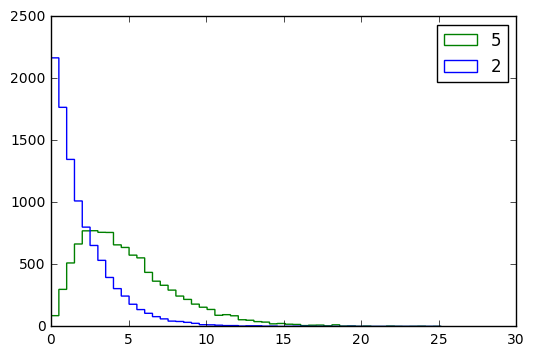

In [41]:
plt.hist([chi_squared_df2,chi_squared_df5], bins=50, histtype='step',label=['2','5'])
plt.legend(loc='upper right')
plt.show()

# Modality

What is we have multiple peaks? For instance, two Gaussians together, "bimodal." We can model these using two normal distributions with different parameters. These are called Gaussian mixture models, and can be useful for classifying data. 